<a href="https://colab.research.google.com/github/SiyiGit/github_actions/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install opendatasets
!pip install opendatasets

In [3]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [ ]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:25<00:00, 112MB/s]


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [ ]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
data_dir_test = './new-plant-diseases-dataset/test/test'

In [ ]:
#listing the folders
os.listdir(data_dir_train)

['Grape___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Squash___Powdery_mildew',
 'Pepper,_bell___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Soybean___healthy',
 'Potato___healthy',
 'Apple___Cedar_apple_rust',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Septoria_leaf_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Blueberry___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Potato___Early_blight',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Common_rust_',
 'Tomato___Early_blight',
 'Tomato___Bacterial_spot',
 'Strawberry___healthy',
 'Apple___healthy',
 'Tomato___Leaf_Mold',
 'Apple___Apple_scab',
 'Potato___Late_blight',
 'Apple___Black_rot',
 'Grape___Black_rot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Cherry_(including_sour)___Powdery_mildew',
 'Pepper,_bell___Bacterial_spot',
 'Cherry_(including_sour)___healthy',
 'Strawberry___Leaf_scorch',
 'Peach___Bacterial_spot',
 'Corn_(maize)___No

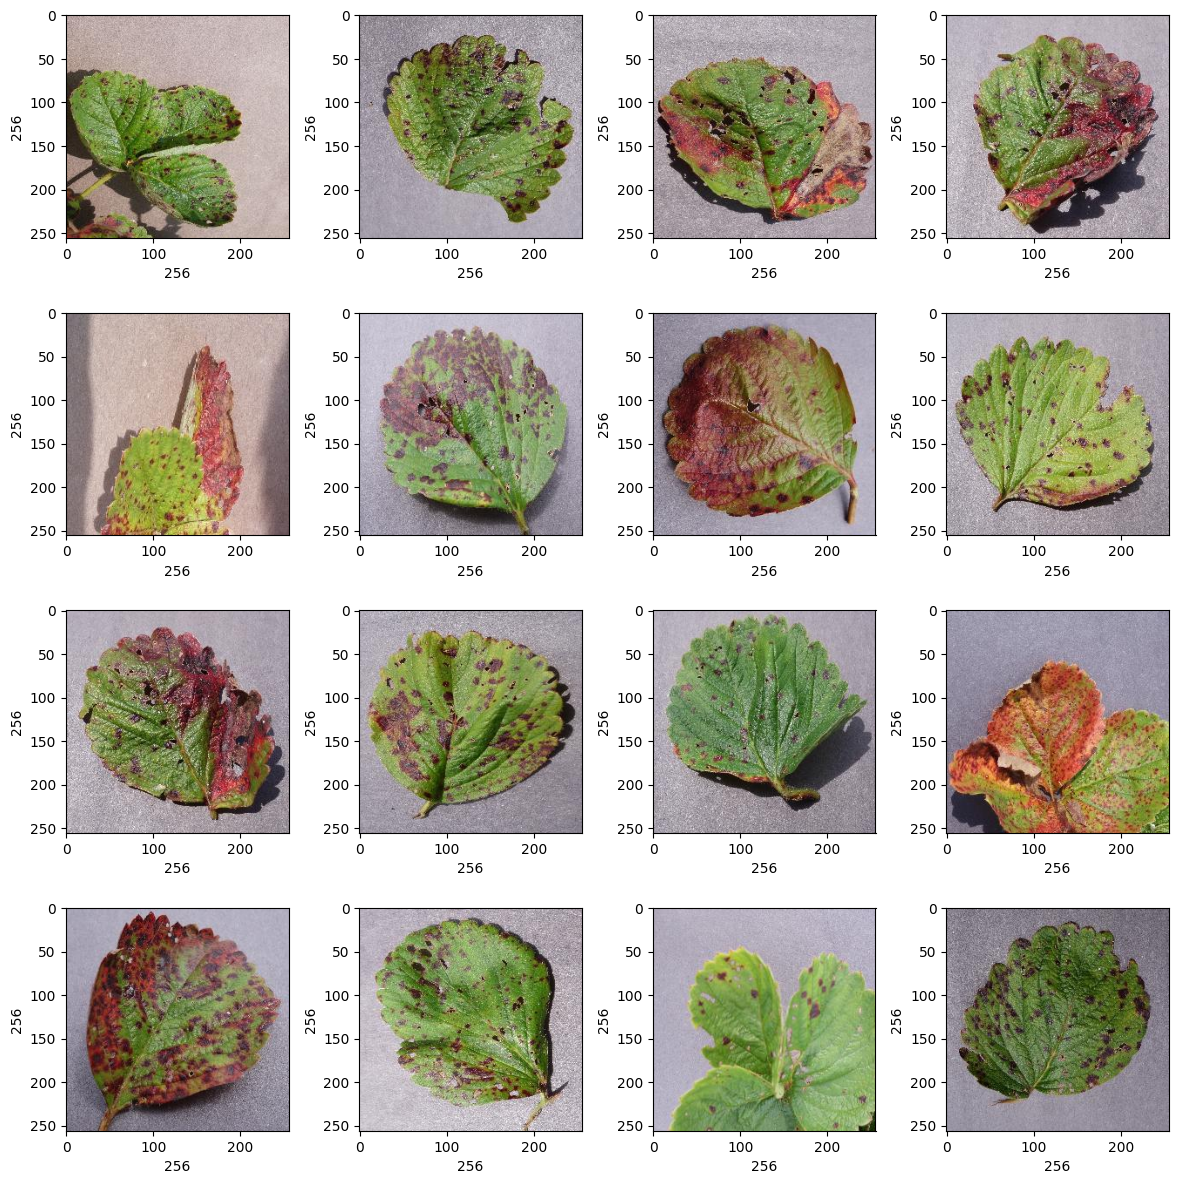

In [ ]:
# showing some random photos for the quality check - Strawberry Leaf scorch
plt.figure(figsize=(12,12))
#path = data_dir
for i in range(1,17):
    data_dir = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch'
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(data_dir +'/'+ random.choice(sorted(os.listdir(data_dir))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
#creation of the data frame with the info for data analyses
import pandas as pd
data = []

for directory in os.listdir(data_dir_train):
    columns = directory.split('___')
    columns.append(directory)

    sub_path = data_dir_train + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))

    data.append(columns)

data = pd.DataFrame(data, columns=['Plant', 'Disease', 'Directory', 'Files'])
data.sort_values(by='Plant')

Plant                               Disease  \
24                    Apple                             Black_rot   
22                    Apple                            Apple_scab   
20                    Apple                               healthy   
7                     Apple                      Cedar_apple_rust   
12                Blueberry                               healthy   
29  Cherry_(including_sour)                               healthy   
27  Cherry_(including_sour)                        Powdery_mildew   
32             Corn_(maize)                  Northern_Leaf_Blight   
16             Corn_(maize)                          Common_rust_   
15             Corn_(maize)                               healthy   
11             Corn_(maize)   Cercospora_leaf_spot Gray_leaf_spot   
25                    Grape                             Black_rot   
0                     Grape                               healthy   
10                    Grape    Leaf_blight_(Isariopsis_Leaf_Spot)   
8                     Grape                  Esca_(Black_Measles)   
13                   Orange       Haunglongbing_(Citrus_greening)   
36                    Peach                               healthy   
31                    Peach                        Bacterial_spot   
28             Pepper,_bell                        Bacterial_spot   
3              Pepper,_bell                               healthy   
23                   Potato                           Late_blight   
6                    Potato                               healthy   
14                   Potato                          Early_blight   
33                Raspberry                               healthy   
5                   Soybean                               healthy   
2                    Squash                        Powdery_mildew   
19               Strawberry                               healthy   
30               Strawberry                           Leaf_scorch   
34                   Tomato                           Target_Spot   
35                   Tomato                           Late_blight   
18                   Tomato                        Bacterial_spot   
21                   Tomato                             Leaf_Mold   
17                   Tomato                          Early_blight   
9                    Tomato                    Septoria_leaf_spot   
4                    Tomato         Tomato_Yellow_Leaf_Curl_Virus   
1                    Tomato                   Tomato_mosaic_virus   
26                   Tomato  Spider_mites Two-spotted_spider_mite   
37                   Tomato                               healthy   

                                            Directory  Files  
24                                  Apple___Black_rot   1987  
22                                 Apple___Apple_scab   2016  
20                                    Apple___healthy   2008  
7                            Apple___Cedar_apple_rust   1760  
12                                Blueberry___healthy   1816  
29                  Cherry_(including_sour)___healthy   1826  
27           Cherry_(including_sour)___Powdery_mildew   1683  
32                Corn_(maize)___Northern_Leaf_Blight   1908  
16                        Corn_(maize)___Common_rust_   1907  
15                             Corn_(maize)___healthy   1859  
11  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   1642  
25                                  Grape___Black_rot   1888  
0                                     Grape___healthy   1692  
10         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   1722  
8                        Grape___Esca_(Black_Measles)   1920  
13           Orange___Haunglongbing_(Citrus_greening)   2010  
36                                    Peach___healthy   1728  
31                             Peach___Bacterial_spot   1838  
28                      Pepper,_bell___Bacterial_spot   1913  
3                              Pepper,_bell___healthy   1988  
23     

In [ ]:
#Total of pictures
data['Files'].sum()

70295

In [ ]:
data['Disease']

0                                  healthy
1                      Tomato_mosaic_virus
2                           Powdery_mildew
3                                  healthy
4            Tomato_Yellow_Leaf_Curl_Virus
5                                  healthy
6                                  healthy
7                         Cedar_apple_rust
8                     Esca_(Black_Measles)
9                       Septoria_leaf_spot
10      Leaf_blight_(Isariopsis_Leaf_Spot)
11     Cercospora_leaf_spot Gray_leaf_spot
12                                 healthy
13         Haunglongbing_(Citrus_greening)
14                            Early_blight
15                                 healthy
16                            Common_rust_
17                            Early_blight
18                          Bacterial_spot
19                                 healthy
20                                 healthy
21                               Leaf_Mold
22                              Apple_scab
23         

ValueError: num must be an integer with 1 <= num <= 16, not 17

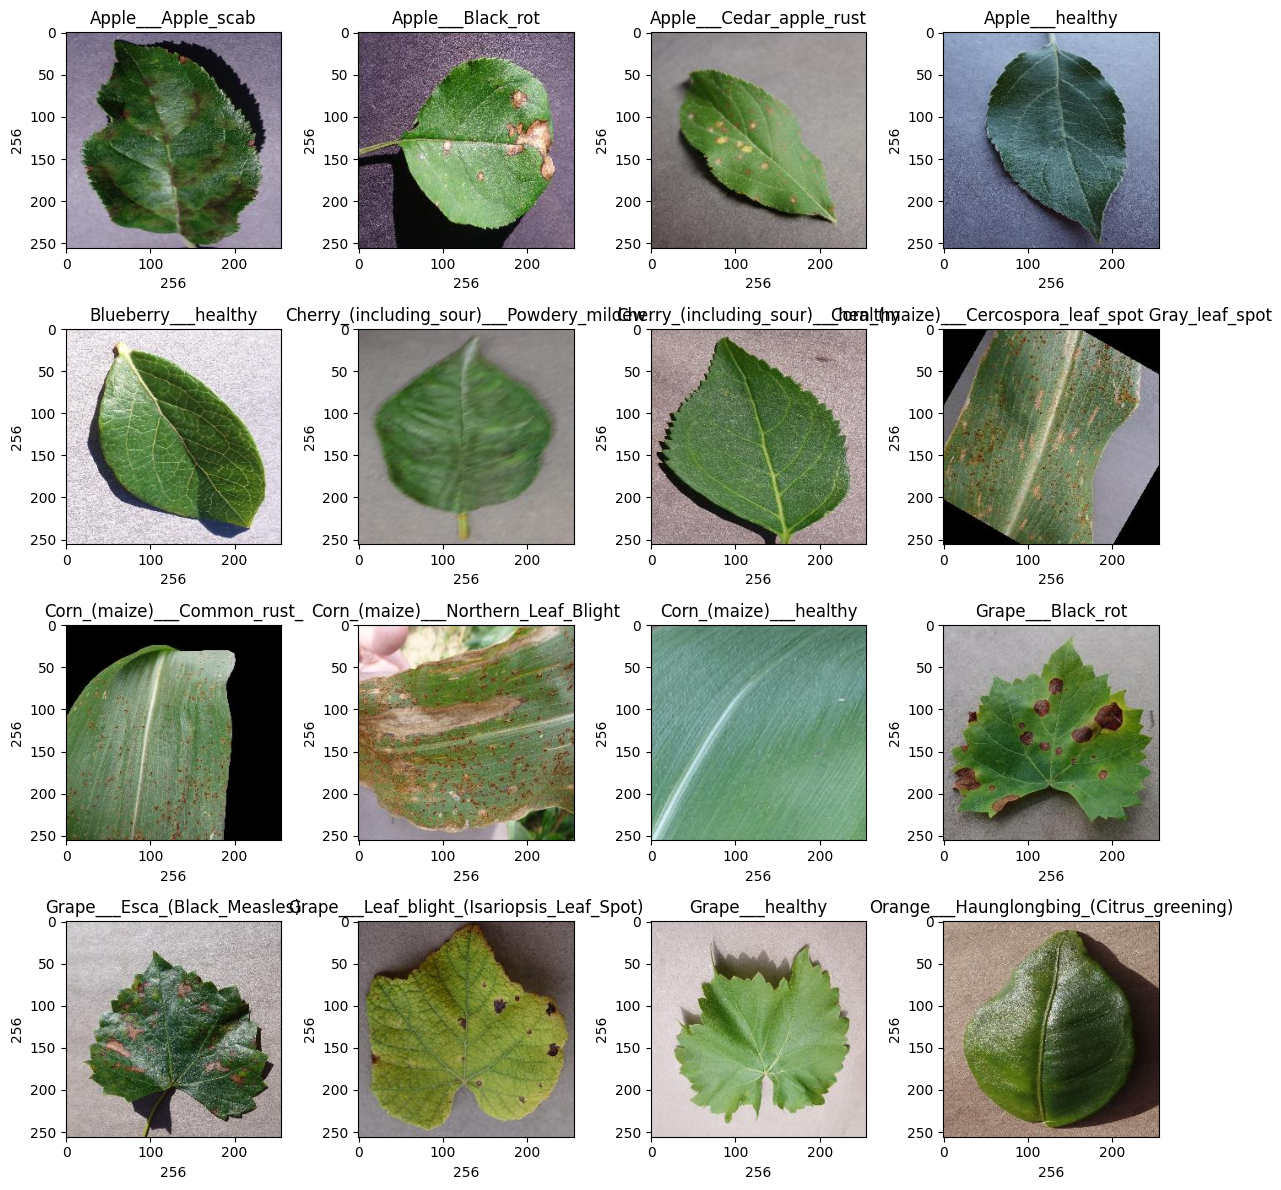

In [ ]:
#showing random pictures from the folder _train
plt.figure(figsize=(12,12))

#data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

folders = sorted(os.listdir(data_dir_train))

for i, folder in enumerate(folders):
    plt.subplot(4, 4,i+1)
    plt.tight_layout()
    image_file = os.path.join(data_dir_train, folder, os.listdir(os.path.join(data_dir_train, folder))[0])
    image = imread(image_file)
    plt.imshow(image)
    plt.xlabel(image.shape[1], fontsize=10)  # width of image
    plt.ylabel(image.shape[0], fontsize=10)  # height of image
    plt.title(folder)

plt.show()

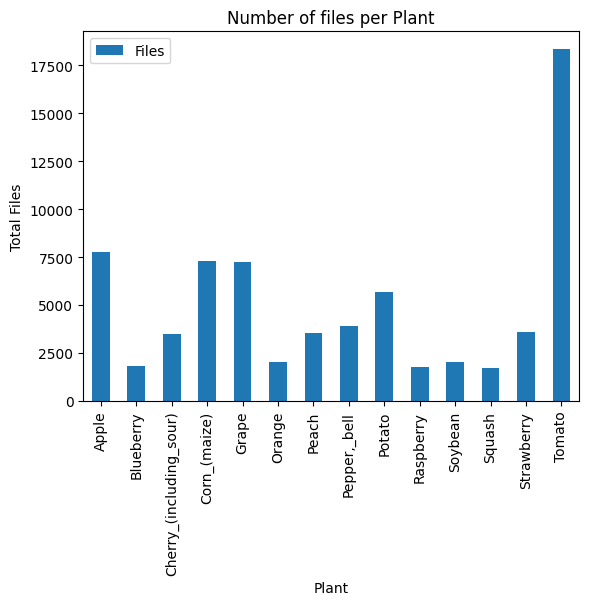

In [ ]:
data.groupby('Plant')['Files'].sum().plot(kind='bar')
plt.legend()
plt.xlabel('Plant')
plt.ylabel('Total Files')
plt.title('Number of files per Plant')
plt.show()


<ipython-input-14-8793a2ec4f9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()


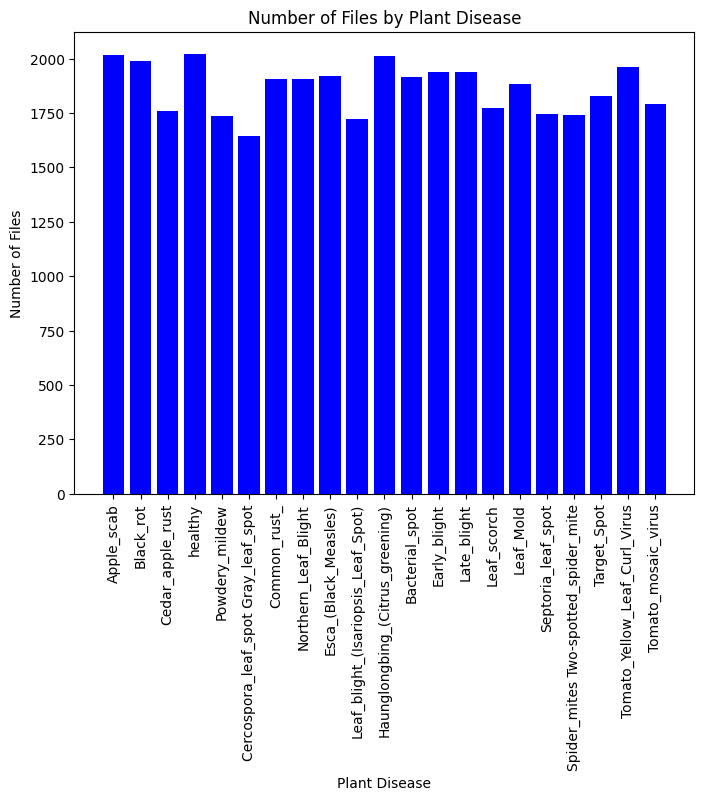

In [ ]:
grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['Disease'], grouped_data['Files'], color='blue')
plt.title('Number of Files by Plant Disease')
plt.xlabel('Plant Disease')
plt.ylabel('Number of Files')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig_a= px.bar(data, x="Plant", y="Files", color="Disease")
fig_a.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.00,
    xanchor="right",
    x=1
))

In [ ]:
px.bar(data, x="Disease", y="Files", color="Plant")

In [ ]:
folders=sorted(os.listdir(data_dir_train))

In [ ]:
resolutions=[]
color_distributions=[]
sizes=[]

In [ ]:
#Iterate over each image file in each folder
for dirpath, dirnames, filenames in os.walk(data_dir_train):
  for filename in filenames:
     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
      #Load image file with OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)
            #Extract resolution / color distribution & size
            resolution=img.shape[:2]
            resolutions.append(resolution)
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)
            size=os.path.getsize(img_path)
            sizes.append(size)



In [ ]:
 #Convert the lists to np arrays for manipulation
 sizes=np.array(sizes)
 resolutions=np.array(resolutions)
 color_distributions=np.array(color_distributions)

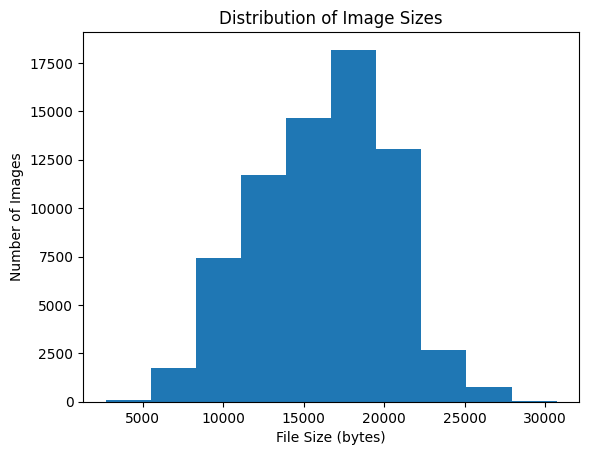

In [ ]:
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [ ]:

fig = px.histogram(x=sizes, nbins=25, title="Distribution of Image Sizes")
fig.update_layout(
    xaxis_title="File Size",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


In [ ]:

#Print the resolution (width and height) within our dataset to have insights into the overall image dimensions.
print(resolutions)

[[256 256]
 [256 256]
 [256 256]
 ...
 [256 256]
 [256 256]
 [256 256]]


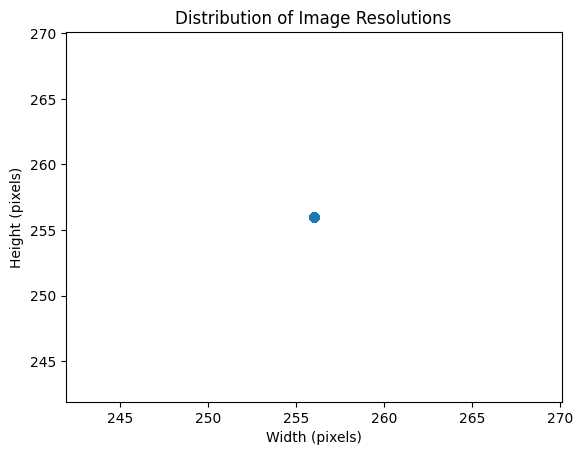

In [ ]:
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [ ]:

df = pd.DataFrame(resolutions, columns=['width', 'height'])

In [ ]:

fig = px.scatter_3d(df, x='width', y='height', z=df.index,
                    title='Distribution of Image Resolutions',
                    labels={'width': 'Width (pixels)',
                            'height': 'Height (pixels)',
                            'index': 'Image Index'},
                    color=df.index)

In [ ]:
fig.update_traces(marker=dict(size=2, line=dict(width=0.5)))

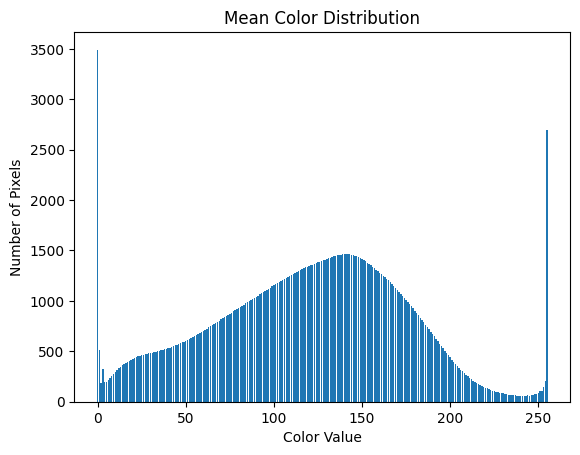

In [ ]:
#Calculate the mean color distribution to understand the dominant colors in the dataset
mean_color_distribution = np.mean(color_distributions, axis=0)

plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

In [ ]:

import plotly.graph_objects as go

mean_color_distribution = np.mean(color_distributions, axis=0)
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Mean Color Distribution")
)
fig.update_layout(
    title="Mean Color Distribution",
    xaxis_title="Color Value",
    yaxis_title="Number of Pixels")

In [ ]:
#Color distribution for each image for patterns and variation analysis, color composition

# bar traces for each color value
traces = []
for i in range(256):
    traces.append(go.Bar(x=np.arange(len(color_distributions)), y=color_distributions[:, i], name=str(i)))

# Create the figure and set the layout
fig = go.Figure(data=traces)
fig.update_layout(title="Color Distributions for Each Image", xaxis_title="Image Index", yaxis_title="Number of Pixels", barmode="stack")
# Show the plot
fig.show()

In [ ]:

data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
all_labels = {'Apple___Apple_scab':0, 'Apple___Black_rot':1, 'Apple___Cedar_apple_rust':2, 'Apple___healthy':3, 'Blueberry___healthy':4, 'Cherry_(including_sour)___Powdery_mildew':5, 'Cherry_(including_sour)___healthy':6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot':7, 'Corn_(maize)___Common_rust_':8, 'Corn_(maize)___Northern_Leaf_Blight':9, 'Corn_(maize)___healthy':10, 'Grape___Black_rot':11, 'Grape___Esca_(Black_Measles)':12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':13, 'Grape___healthy':14, 'Orange___Haunglongbing_(Citrus_greening)':15, 'Peach___Bacterial_spot':16, 'Peach___healthy':17, 'Pepper,_bell___Bacterial_spot':18, 'Pepper,_bell___healthy':19, 'Potato___Early_blight':20, 'Potato___Late_blight':21, 'Potato___healthy':22, 'Raspberry___healthy':23, 'Soybean___healthy':24, 'Squash___Powdery_mildew':25, 'Strawberry___Leaf_scorch':26, 'Strawberry___healthy':27, 'Tomato___Bacterial_spot':28, 'Tomato___Early_blight':29, 'Tomato___Late_blight':30, 'Tomato___Leaf_Mold':31, 'Tomato___Septoria_leaf_spot':32, 'Tomato___Spider_mites Two-spotted_spider_mite':33, 'Tomato___Target_Spot':34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus':35, 'Tomato___Tomato_mosaic_virus':36, 'Tomato___healthy':37}

# Create empty lists to store images and labels
images = []
labels = []

# Loop through all folders in the data directory
for folder in os.listdir(data_dir_train):
    # Loop through all images in the folder
    for file in os.listdir(os.path.join(data_dir_train, folder)):
        # Load the image
        img = cv2.imread(os.path.join(data_dir_train, folder, file))
        # Resize the image to 256x256
        img = cv2.resize(img, (256, 256))
        # Convert the image to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Convert the image to an array
        img = np.array(img)
        # Append the image to the list of images
        images.append(img)
        # Append the label to the list of labels
        labels.append(all_labels[folder])

# Convert the lists of images and labels to arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the arrays
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)



Images shape: (70295, 256, 256)
Labels shape: (70295,)


CNN model

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn import metrics
import tensorflow as tf


In [ ]:
## Defining batch specfications
batch_size = 100
img_height = 255
img_width = 255

In [ ]:
## loading training set
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                  seed=42,
                                                                  image_size= (img_height, img_width),
                                                                  batch_size=batch_size)

Found 70295 files belonging to 38 classes.


In [ ]:
## loading validation set
val_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir_val,
                                                                  seed=42,
                                                                  image_size= (img_height, img_width),
                                                                  batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [ ]:
class_names = train_data.class_names

In [ ]:
## Defining Cnn
from tensorflow.keras import layers
cnn_model = tf.keras.models.Sequential([layers.BatchNormalization(),
                                        layers.Conv2D(32, 3, activation='relu'),
                                        layers.MaxPooling2D(),
                                        layers.Conv2D(64, 3, activation='relu'),
                                        layers.MaxPooling2D(),
                                        layers.Conv2D(128, 3, activation='relu'),
                                        layers.MaxPooling2D(),
                                        layers.Flatten(),
                                        layers.Dense(256, activation='relu'),
                                        layers.Dense(len(class_names), activation= 'softmax')])


In [ ]:
cnn_model.compile(loss='categorical_crossentropy', # loss function
                  optimizer='adam',                # gradien descent algorithm
                  metrics=['accuracy'],           # accuracy metric
                  loss_weights = [1,0.3,0.3])


In [ ]:
training_history = cnn_model.fit(train_data,
                                 validation_data= val_data,
                                 epochs = 50)

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 38) are incompatible


In [ ]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

learning_rate = training_history.history['lr']

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot(np.arange(1 , 11, 1),
         train_acc,
         label = 'Training Accuracy',
         color = 'blue')


plt.plot(np.arange(1 , 11, 1),
         val_acc,
         label = 'Validation Accuracy',
         color = 'red')

plt.legend()

plt.show()


In [ ]:
test_pred = cnn_model.predict(X_test)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_class))

